# Vividness Features: Experiment 2 Analysis

See Experiment 1 notebook for task description.  

***Relative to Experiment 1, the changes are:***
* *Vividness question is now after gist, not before (so providing more retrieval support)*
* *3 famous faces substituted due to low recognition*
* *As a result, a new event list was generated for Experiment 2, but events are still fixed across participants*

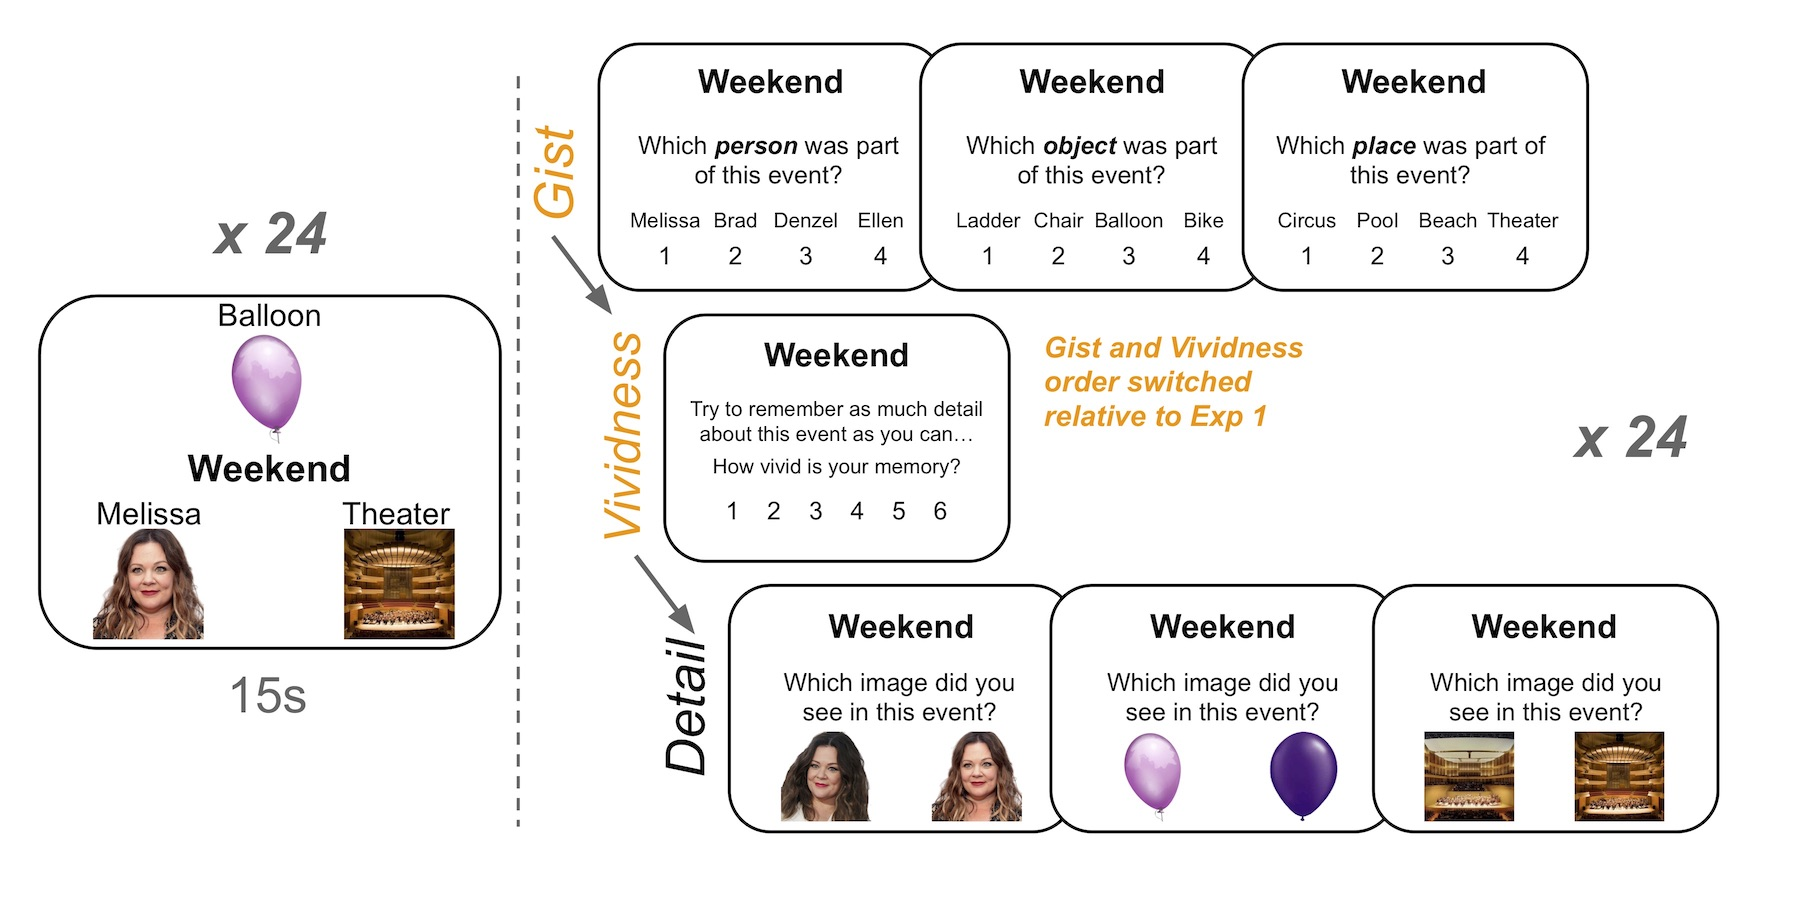

In [1]:
from IPython.display import Image
Image("Task-design_Exp2.jpg", width = 800)

# Sections

1. Data Import and Checks  
2. Vividness Ratings  
3. Gist and Detail Memory  
4. **Attribute Relationships**  

***

# 1. Data Import and Checks

In [2]:
# load my functions:
import importlib, sys, os
sys.path.append(os.getcwd())

import vividness_analysis_functions
importlib.reload(vividness_analysis_functions)
from vividness_analysis_functions import *

In [3]:
import warnings
warnings.simplefilter('ignore')

# basic packages:
import glob
import pandas as pd
import numpy as np

# stats
import pingouin as pg

# visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns

%matplotlib inline

# set to show vector images
set_matplotlib_formats('pdf', 'svg')

Find all csv data files:

In [4]:
data_dir = '../data/experiment2/'
print('Fetching data from:',data_dir)

my_files = np.sort(glob.glob(data_dir + "/*.csv")).tolist()

print('\nFound **',len(my_files),'** participant data files\n')

Fetching data from: ../data/experiment2/

Found ** 48 ** participant data files



Load and merge all subject data files into a single dataframe:

In [5]:
print('Merging data files...')
my_list = [] 
for filename in my_files:

    df = pd.read_csv(filename, index_col=None, header=0)
    my_list.append(df)

# concatenate across subjects
my_data = pd.concat(my_list, axis=0, ignore_index=True)
print('\nData frame my_data created for all participants:')
my_data.head()

Merging data files...

Data frame my_data created for all participants:


,participant,event_id,encoding.thisN,theme,object_label,person_label,place_label,resp_encSpace.rt,retrieval.thisN,resp_ret_vividness.keys,...,resp_detailmem1.keys,resp_detailmem2.corr,resp_detailmem2.rt,resp_detailmem2.keys,resp_detailmem3.corr,resp_detailmem3.rt,resp_detailmem3.keys,familiarity.thisN,resp_facefam.keys,resp_facefam.rt
0,201,24.0,0.0,Family,Extinguisher,Ryan,Basketball,10.133435,8.0,3.0,...,1.0,1.0,3.117665,1.0,1.0,1.023085,2.0,18.0,1.0,0.548810
1,201,22.0,1.0,Travel,Computer,George,Field,12.102900,16.0,5.0,...,1.0,0.0,3.319200,1.0,1.0,0.849315,2.0,22.0,1.0,2.180065
2,201,13.0,2.0,Errands,Stopwatch,Tom,Icerink,13.055985,13.0,5.0,...,2.0,1.0,2.734640,1.0,0.0,1.631745,1.0,17.0,1.0,0.651290
3,201,11.0,3.0,Games,Binoculars,Leonardo,Lake,13.120000,5.0,5.0,...,1.0,1.0,1.084420,1.0,1.0,1.934175,2.0,1.0,1.0,1.587370
4,201,21.0,4.0,Home,Gloves,Angelina,Cabin,13.435530,18.0,4.0,...,1.0,1.0,1.051235,2.0,1.0,2.302695,2.0,9.0,1.0,0.483200


Double check that we have 24 events per subject:

In [6]:
ntrials = my_data.groupby('participant').count()
if any(ntrials["event_id"] != 24):
    print('Error: at least one participant does not have 24 trials')
else:
    print('All participants have 24 trials')

All participants have 24 trials


## Data Quality

a) Too fast RTs?  
b) High frequency of same key presses?  
c) Gist memory -- chance is 25%, is performance < 30%?  
d) Detail memory -- chance is 50%, is performance < 55%?  

In [7]:
# check data and return cleaned data and a list of subject IDs to exclude:
my_data, exclude_subs = quality_check(my_data)


Number of subjects with median RT <= .75s -- 6 out of 48 subjects

Number of subjects with consistent key presses (> 75% same key) -- 1 out of 48 subjects

Number of subjects with gist memory <= 30% -- 10 out of 48 subjects

Number of subjects with detail memory <= 55% -- 8 out of 48 subjects

Removing subjects from my_data ....


### Vividness frequencies
Even though we don't need to exclude these subjects based on above criteria, I'm also adding in an option here to exclude subjects who do not have variability in their vividness responses (i.e. > 90% of responses are the same).

In [8]:
# run function to exclude subjects based on vividness distribution
# returns cleaned data and updated list of excluded subjects
my_data, exclude_subs = quality_vividness(my_data, exclude_subs)

Number of subjects with consistent vividness responses (> 90% same key) -- 1 out of 36 subjects

Removing subjects from my_data ....


In [9]:
#print filenames of excluded subjects to view actual ID numbers
print('Excluded IDs =', exclude_subs)
exclude_files = np.array([[i for i in my_files if str(j) in i] for j in exclude_subs]).reshape(len(exclude_subs)).tolist()

Excluded IDs = [210, 212, 215, 218, 219, 221, 224, 229, 233, 234, 235, 239, 241]


In [10]:
perc_exclude = round((len(exclude_subs)/len(my_files))*100,2)
print('Total number of excluded subjects =',len(exclude_subs),'out of',len(my_files),'subjects','(',perc_exclude,'%)')

print('\n\n** FINAL ANALYSIS N =',len(my_data['participant'].unique()),'**\n\n')

Total number of excluded subjects = 13 out of 48 subjects ( 27.08 %)


** FINAL ANALYSIS N = 35 **




For individual differences analyses, save a csv file with the file names of included subjects:

In [11]:
data_file = 'included_participants_exp2.csv'

include_files = pd.DataFrame([i for i in my_files if i not in exclude_files])
include_files.to_csv('../data/' + data_file, index=False, header=False)

print('\nSaved',len(my_data['participant'].unique()),'file names to:',data_file,'\n')


Saved 35 file names to: included_participants_exp2.csv 



### Face familiarity

After the memory test subjects were asked to indicate if they knew the famous people that were part of the events, using the responses:  
1 (know their name),   
2 (recognize but cannot name),   
3 (do not recognize)  
Frequency of responses across subjects by person:

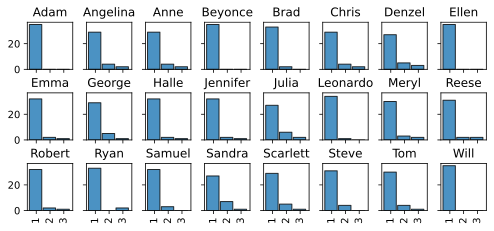

In [12]:
my_data.hist(column='resp_facefam.keys', by="person_label", bins=3,
             xlabelsize=10, ylabelsize=10, figsize=(8,3.5),
             edgecolor='black', width=0.9, alpha=.8,
             range=(1,4), layout=(3,8), align='left',
             sharey=True, sharex=True)
plt.grid(False)
plt.show()

To substitute for future experiments, which people were not very recognisable (< 2/3 of participant knew their name):

In [13]:
# get count of response per famous person
key_data = my_data.groupby('person_label')['resp_facefam.keys'].value_counts().unstack().reset_index()
key_cols = [1.0,2.0,3.0]
key_data[key_cols] = (key_data[key_cols]/len(my_data['participant'].unique()))*100

# which people have a '1' response < 66% of the time
key_data.loc[key_data[1.0] < 66,'person_label'].tolist()

[]

## Encoding Responses

What is the distribution of encoding RTs from 0-15s across subjects when they responded?

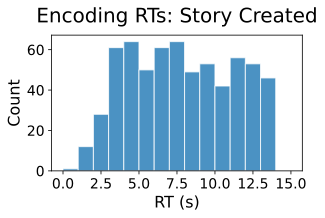

In [14]:
# show distribution of values:
my_data.hist(column='resp_encSpace.rt', bins=15,
            xlabelsize=14, ylabelsize=14, figsize=(4.5,2.5),
            edgecolor='white', alpha=.8,
            range=(0,15), align='mid')
plt.xlabel('RT (s)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Encoding RTs: Story Created', fontsize=20, y=1.05)
plt.grid(False)
plt.show()

In [15]:
# print mean and SE across subjects:
enc_rt = my_data.groupby('participant').mean().reset_index()[['participant','resp_encSpace.rt']]
enc_rt.agg(Mean=('resp_encSpace.rt', 'mean'),
           SE=('resp_encSpace.rt', 'sem'))

,resp_encSpace.rt
Mean,8.168670
SE,0.401903


# 2. Memory Vividness

Here, I'm plotting the distribution of vividness ratings across subjects and the mean per subject:

In [16]:
# group_by subject and calculate the mean -- box plot of subject values
sub_vividness = pd.DataFrame(my_data.groupby(['participant']).mean()['resp_ret_vividness.keys'])
sub_vividness.columns=['mean vividness']

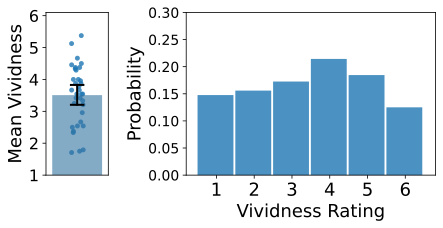

In [17]:
# plot:
fig, axes = plt.subplots(1, 2, figsize=(7,3), 
                         gridspec_kw={
                               'width_ratios': [1, 4],
                               'wspace': 0.5})

plt.axes(axes[0])
sns.barplot(y='mean vividness',data=sub_vividness, alpha=.6, 
            dodge=True, errcolor="k", errwidth=2, capsize=.2)
sns.stripplot(y='mean vividness',data=sub_vividness,
              size=5, alpha=.8, zorder=0, jitter=.1)
plt.ylabel('Mean Vividness', fontsize=18)
plt.yticks(fontsize=16)
plt.grid(False)
plt.xticks([])
plt.ylim(1,6.1)


# show distribution of values:
plt.axes(axes[1])
my_data.hist(ax=axes[1], column='resp_ret_vividness.keys', bins=6,
            xlabelsize=16, ylabelsize=14, width=0.95, alpha=.8,
            range=(1,7), align='left', density=True)
plt.xlabel('Vividness Rating', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.ylim([0,.3])
plt.yticks(fontsize=14)
plt.xticks(fontsize=18)
plt.title('')
plt.grid(False)
plt.show()

In [18]:
sub_vividness.agg(Mean=('mean vividness', 'mean'),
                  SE=('mean vividness', 'sem'))

,mean vividness
Mean,3.507143
SE,0.156793


***Create df for subsequent analyses:***

In [19]:
# now merge vividness ratings with the objective memory attributes for subsequent analyes:
# produces 1 row per trial with columns for all 7 memory scores
memory_data = format_memory_data(my_data)
memory_data.head()

,participant,event,vividness,detail_object,detail_person,detail_place,gist_object,gist_person,gist_place
0,201,24.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
1,201,22.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0
2,201,13.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0
3,201,11.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0
4,201,21.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0


# 3. Gist and Detail Memory

Proportion correct for identifying the person, place, and object associated with the theme - chance = 25% for gist and 50% for detail. 

## Gist

In [20]:
# calculate mean per subject and feature
this_data = memory_data.melt(id_vars=['participant','event'], value_vars=['gist_object','gist_person','gist_place'], var_name='type', value_name='score')
sub_gist = pd.DataFrame(this_data.groupby(['participant','type']).mean()[['score']]).reset_index()

In [21]:
# group averages by feature type:
pd.DataFrame(sub_gist.groupby(['type']).agg(Mean=('score', 'mean'),
                                            SE=('score', 'sem')))

,Mean,SE
type,,
gist_object,0.828571,0.029476
gist_person,0.769048,0.024298
gist_place,0.836905,0.027669


## Detail

In [22]:
# calculate mean per subject and feature - not conditional on correct gist memory
this_data = memory_data.melt(id_vars=['participant','event'], value_vars=['detail_object','detail_person','detail_place'], var_name='type', value_name='score')
sub_detail = pd.DataFrame(this_data.groupby(['participant','type']).mean()[['score']]).reset_index()

In [23]:
# calculate group averages by feature type (as shown in above figure) and print:
pd.DataFrame(sub_detail.groupby(['type']).agg(Mean=('score', 'mean'),
                                              SE=('score', 'sem')))

,Mean,SE
type,,
detail_object,0.758333,0.018061
detail_person,0.773810,0.019941
detail_place,0.727381,0.019124


**Now, for all subsequent analyses, I'm setting detail memory to 0 where gist = 0**  
*(the reasoning is that detail information can't influence vividness judgments if at least the gist wasn't recalled)*  

So, in "memory_data" gist is '1' if at least the gist is recalled, and detail is '1' if the detail and gist is recalled.

In [24]:
memory_data_orig = memory_data.copy()

memory_data.detail_object[memory_data.gist_object == 0] = 0
memory_data.detail_person[memory_data.gist_person == 0] = 0
memory_data.detail_place[memory_data.gist_place == 0] = 0

# finally, create summary measures
memory_data["object"] = memory_data[["gist_object","detail_object"]].sum(axis=1)
memory_data["person"] = memory_data[["gist_person","detail_person"]].sum(axis=1)
memory_data["place"] = memory_data[["gist_place","detail_place"]].sum(axis=1)
memory_data["total"] = memory_data[["object","person","place"]].sum(axis=1)

memory_data.head()

,participant,event,vividness,detail_object,detail_person,detail_place,gist_object,gist_person,gist_place,object,person,place,total
0,201,24.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,4.0
1,201,22.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0
2,201,13.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0
3,201,11.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0
4,201,21.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,6.0


Now with detail conditional upon gist, how many features do participants recall from each memory cue?

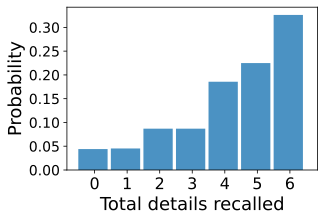

In [25]:
# plot distribution of total memory scores per event (0-6)
# show distribution of values:
memory_data.hist(column='total', bins=7,
                 xlabelsize=16, ylabelsize=14, figsize=(4.5,3),
                 width=0.9, alpha=.8,
                 range=(0,7), align='left', density=True)
plt.xlabel('Total details recalled', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.title('')
plt.grid(False)
plt.show()

# 4. Vividness-Attribute Relationships

I start by checking that memory vividness is actually correlated with the total number of attributes recalled.

Next, I calculate the within-subject correlation between each individual attribute and memory vividness, checking the independent influence of gist and detail memory on vividness ratings.

## Total Detail

*Does overall memory influence vividness ratings?*

In [26]:
# run correlation, fetching r per subject and feature:
cor_params = vividness_correlations(memory_data, ['total'])

# fisher z transform before stats
cor_params["z"] = np.arctanh(cor_params.total.astype('float'))

# one-sample t-test
pg.ttest(cor_params.z, 0).round(4)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,14.0465,34,two-sided,0.0,"[0.5, 0.67]",2.3743,6.016e+12,1.0


In [27]:
# group average
pd.DataFrame(cor_params.agg(Mean=('z', 'mean'),
                             SE=('z', 'sem')))

,z
Mean,0.582211
SE,0.041449


## Content x Specificity

*How does the specificity of retrieval influence memory vividness, and is this modulated by content?*

In [31]:
# calculate gist-specific correlations
cor_params_gist = vividness_correlations(memory_data, ["gist_object","gist_person","gist_place"]).melt(id_vars="index", var_name="content", value_name="gist")
cor_params_gist.replace({"gist_object":"object", "gist_person":"person", "gist_place":"place"}, inplace=True)

In [32]:
# calculate detail-specific correlations (where gist = 1)
cor_detail_object = vividness_correlations(memory_data[memory_data.gist_object == 1], ["detail_object"])
cor_detail_person = vividness_correlations(memory_data[memory_data.gist_person == 1], ["detail_person"])
cor_detail_place = vividness_correlations(memory_data[memory_data.gist_place == 1], ["detail_place"])

# merge detail to single df:
cor_params_detail = cor_detail_object.merge(cor_detail_person)
cor_params_detail = cor_params_detail.merge(cor_detail_place).melt(id_vars='index', var_name="content", value_name="detail")
cor_params_detail.replace({"detail_object":"object", "detail_person":"person", "detail_place":"place"}, inplace=True)

In [33]:
# merge gist and detail to single df:
cor_params = cor_params_detail.merge(cor_params_gist, how="outer")
cor_params = cor_params.melt(id_vars=["index","content"], var_name="specificity", value_name="r")

In [34]:
# fisher z transform before stats
cor_params["z"] = np.arctanh(cor_params.r.astype('float'))
cor_params.head()

,index,content,specificity,r,z
0,201,object,detail,-0.071043,-0.071163
1,202,object,detail,0.287113,0.295417
2,203,object,detail,-0.213055,-0.216370
3,204,object,detail,-0.083218,-0.083411
4,205,object,detail,-0.181989,-0.184039


In [35]:
# one-sample t-tests:
tests = []
for c in cor_params.content.unique():
    for s in cor_params.specificity.unique():
        t = pg.ttest(cor_params.loc[(cor_params.content == c) & (cor_params.specificity == s),"z"], 0).round(4)
        t['content'] = c
        t['specificity'] = s
        tests.append(t)

tests = pd.concat(tests)

# add bonferroni correction:
tests["p-bonf"] = pg.multicomp(tests["p-val"].tolist(), alpha=.05, method="bonf")[1]
tests

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power,content,specificity,p-bonf
T-test,2.4360,34,two-sided,0.0202,"[0.02, 0.18]",0.4118,2.36,0.6579,object,detail,0.1212
T-test,7.7987,34,two-sided,0.0000,"[0.25, 0.43]",1.3182,2.764e+06,1.0000,object,gist,0.0000
T-test,0.1100,34,two-sided,0.9130,"[-0.08, 0.09]",0.0186,0.182,0.0513,person,detail,1.0000
T-test,12.5537,34,two-sided,0.0000,"[0.36, 0.5]",2.1220,2.735e+11,1.0000,person,gist,0.0000
T-test,3.0800,34,two-sided,0.0041,"[0.06, 0.28]",0.5206,9.235,0.8490,place,detail,0.0246
T-test,9.7355,34,two-sided,0.0000,"[0.27, 0.42]",1.6456,4.088e+08,1.0000,place,gist,0.0000


In [36]:
# repeated measures anova:
pg.rm_anova(data=cor_params, dv='z', within=['content','specificity'], subject="index", effsize="n2", detailed=True).round(4)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,content,0.0712,2,68,0.0356,0.6526,0.5239,0.5235,0.0048,0.9968
1,specificity,4.1328,1,34,4.1328,51.2476,0.0000,0.0000,0.2809,1.0000
2,content * specificity,0.5635,2,68,0.2817,5.4862,0.0062,0.0072,0.0383,0.9432


In [40]:
memory_measures = ["gist_object","gist_person","gist_place","detail_object","detail_person","detail_place"]

In [37]:
# plot:
cor_params = cor_params.pivot(index='index', columns=['specificity','content'], values='r')
cor_params.columns = cor_params.columns.map('_'.join)
cor_params = cor_params[memory_measures].melt()

In [38]:
pal = sns.color_palette("Set2")
colors = pal.as_hex()[:3]

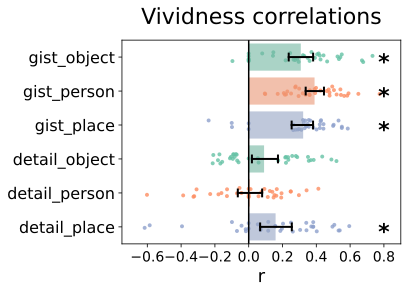

In [39]:
plt.figure(figsize=(5,3.75))

sns.barplot(data=cor_params, y='variable', x='value',
            palette=sns.color_palette(colors + colors),
            alpha=.6, dodge=True, 
            errcolor="k", errwidth=2, capsize=.2)
sns.stripplot(data=cor_params, y='variable', x='value',
              palette=sns.color_palette(colors + colors),
              dodge=True, size=4, zorder=0, alpha=.8, jitter=.15)

# statistical annotation
plt.text(.8, 0.5, "*", ha='center', va='bottom', color="k", 
         fontsize=22, fontweight='bold')
plt.text(.8, 1.5, "*", ha='center', va='bottom', color="k", 
         fontsize=22, fontweight='bold')
plt.text(.8, 2.5, "*", ha='center', va='bottom', color="k", 
         fontsize=22, fontweight='bold')
plt.text(.8, 5.5, "*", ha='center', va='bottom', color="k", 
         fontsize=22, fontweight='bold')

plt.xlabel('r', fontsize=18)
plt.xticks(fontsize=14)
plt.axvline(0, color='k')
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlim([-.75, .9])
plt.title('Vividness correlations', fontsize=22, y=1.05)
plt.show()

### Full Correlation Matrix

In addition to correlations with vividness, here I'm showing the full 6 x 6 correlation matrix of trial-wise correlations.  
Note that this uses the original data (so detail memory can be correct even if gist is incorrect).  

In [41]:
# correlations by subject
my_list = []
for s in memory_data_orig['participant'].unique():
    
    sub_data = memory_data_orig[memory_data_orig['participant'] == s]  
    # correlate and fisher z transform
    sub_cors = sub_data[memory_measures].corr(method="spearman")
    sub_cors[np.round(sub_cors,3) == 1] = np.nan
    sub_cors = np.arctanh(sub_cors)
    #append
    my_list.append(sub_cors)
    
memory_cors = np.dstack(tuple(my_list))
memory_cors[np.isnan(memory_cors)] = 0
print('Dimensions of var x var x subject memory correlations = ' + str(memory_cors.shape))

Dimensions of var x var x subject memory correlations = (6, 6, 35)


group average:

In [42]:
# transforming subject z back to spearman at group level
group_cors = np.tanh(np.nanmean(memory_cors, axis=2))
np.fill_diagonal(group_cors, 0)

# convert to df to name with memory variables
group_cors = pd.DataFrame(group_cors, columns=memory_measures, index=memory_measures)

#get significance and labels
p_mask, labels = fetch_sig_cors(memory_cors, group_cors, sym=True)

heat map (* = p < .05 bonferroni-corrected)

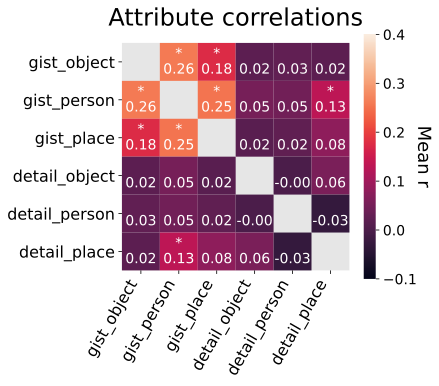

In [43]:
plot_cor_heatmap(group_cors, l = labels, cmap = 'rocket', title = 'Attribute correlations')
plt.show()

### Predictive Model

Finally, using the 6 individual attributes, can we predict the vividness of a new memory?

Here, I'm using linear regression, with cross-validation -- data from across all subjects (so 24 events * Nsubs).  
I'm starting by including all of the features, and then I'll take the least important one out and repeat the process again until there is just 1 predictor left.

**The model returned is that with the highest out-of-sample R-squared value**

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.linear_model import LinearRegression

In [46]:
y = memory_data['vividness']
X = memory_data[memory_measures]

print('Total number of events =', memory_data.shape[0], '\n')

Total number of events = 840 



In [47]:
# specifiy 10 folds, over 5 repetitions
kf = RepeatedStratifiedKFold(random_state=1, n_splits=10, n_repeats=5)

In [48]:
included_features = X.columns.tolist()
X_orig = X

model_weights = []
model_scores = []
for m in range(len(included_features)):
    
    X = X_orig[included_features]
    
    # run cross-validation (LR() adds intercept by default):
    models = cross_validate(LinearRegression(), X, y, cv=kf, scoring = 'r2', return_estimator =True)
    
    # first, let's store the r-squared scores, and show the average:
    scores = models['test_score']
    model_scores.append(scores)
    print('Features =',included_features)
    print('R-squared =',np.round(np.mean(scores),5),'( +/-',np.round(np.std(scores),5),')\n')
    
    # find the weights and drop the lowest feature
    features = []
    for idx, model in enumerate(models['estimator']):
        features.append(pd.DataFrame(model.coef_,
                                     index = included_features, columns=['model_' + str(idx)]))
    weights = pd.concat(features, axis=1, ignore_index=True).transpose()
    model_weights.append(weights) #beta values
    
    lowest_feature = weights.mean().sort_values().index[0]
    included_features.remove(lowest_feature)

Features = ['gist_object', 'gist_person', 'gist_place', 'detail_object', 'detail_person', 'detail_place']
R-squared = 0.30244 ( +/- 0.08044 )

Features = ['gist_object', 'gist_person', 'gist_place', 'detail_object', 'detail_place']
R-squared = 0.30271 ( +/- 0.07936 )

Features = ['gist_object', 'gist_person', 'gist_place', 'detail_object']
R-squared = 0.2987 ( +/- 0.07774 )

Features = ['gist_object', 'gist_person', 'gist_place']
R-squared = 0.29393 ( +/- 0.0771 )

Features = ['gist_object', 'gist_place']
R-squared = 0.24841 ( +/- 0.062 )

Features = ['gist_object']
R-squared = 0.16818 ( +/- 0.06661 )



In [49]:
print('\n*BEST MODEL*:\n')

rsquared_values = pd.DataFrame(model_scores).mean(axis=1)
best_model = np.where(rsquared_values == rsquared_values.max())[0].tolist()[0]

print('R-squared =',np.round(rsquared_values[best_model],4))
print('Features =',model_weights[best_model].columns.to_list(),'\n')


*BEST MODEL*:

R-squared = 0.3027
Features = ['gist_object', 'gist_person', 'gist_place', 'detail_object', 'detail_place'] 



Remember here that gist amounts to gist without the detail, and detail = gist *and* detail

Plot average weights from the full model

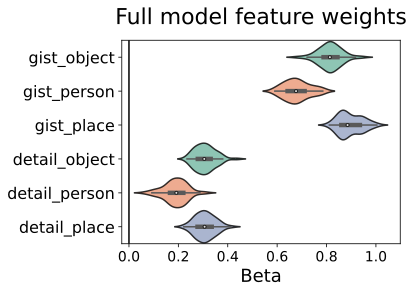

In [50]:
plt.figure(figsize=(5,3.75))
g = sns.violinplot(data=model_weights[0].melt(), 
            y='variable', x='value',
            palette=sns.color_palette(colors + colors), width=0.95)
for violin in g.collections:
        violin.set_alpha(0.8)
        violin.set_edgecolor('k')
plt.xlabel('Beta', fontsize=18)
plt.axvline(0, color='k')
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=14)
plt.title('Full model feature weights', fontsize=22, y=1.05)
plt.show()